# The Probability Density Function (PDF) - Lab

## Introduction

In this lab we will look at building visualizations known as **density plots** to estimate the probability density for a given set of data. 

## Objectives

You will be able to: 

* Calculate the PDF from given dataset containing real valued random variables
* Plot density functions and comment on the shape of the plot
* Plot density functions using seaborn


## Let's get started!

We'll import all the required libraries for you for this lab.

In [2]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import pandas as pd 

#### Import the dataset 'weight-height.csv' as pandas dataframe . Calculate the mean and standard deviation for weights and heights for male and female individually. 

Hint : Use your pandas dataframe subsetting skills like loc(), iloc() and groupby()

In [6]:
male_df['Height'].std()

2.863362228660647

In [8]:
data = pd.read_csv('weight-height.csv')
male_df =  data.loc[data['Gender']=='Male']
female_df =  data.loc[data['Gender']=='Female']

print('Male Height mean: ',male_df['Height'].mean())
print('Male Height sd: ',male_df['Height'].std())
print('Male Weight mean: ',male_df['Weight'].mean())
print('Male Weight sd: ',male_df['Weight'].std())
print('Female Height mean: ',female_df['Height'].mean())
print('Female Height sd: ',female_df['Height'].std())
print('Female weight mean: ',female_df['Weight'].mean())
print('Female weight sd: ',female_df['Weight'].std())

# Male Height mean: 69.02634590621737
# Male Height sd: 2.8633622286606517
# Male Weight mean: 187.0206206581929
# Male Weight sd: 19.781154516763813
# Female Height mean: 63.708773603424916
# Female Height sd: 2.696284015765056
# Female Weight mean: 135.8600930074687
# Female Weight sd: 19.022467805319007

Male Height mean:  69.02634590621741
Male Height sd:  2.863362228660647
Male Weight mean:  187.0206206581932
Male Weight sd:  19.7811545167638
Female Height mean:  63.70877360342507
Female Height sd:  2.696284015765054
Female weight mean:  135.86009300746835
Female weight sd:  19.022467805319028


#### Plot overlapping normalized histograms for male and female heights - use binsize = 10, set alpha level so that overlap can be visualized

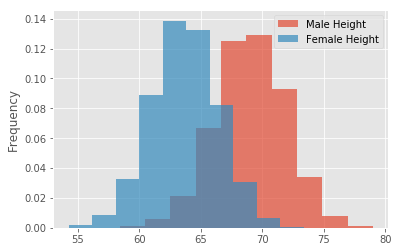

In [22]:
fig, ax = plt.subplots()

ax.hist(male_df['Height'], bins=10, density=True, alpha=0.7, label='Male Height')
ax.hist(female_df['Height'], bins=10, density=True, alpha=0.7, label='Female Height')
ax.set_ylabel('Frequency')
ax.legend()

plt.show()

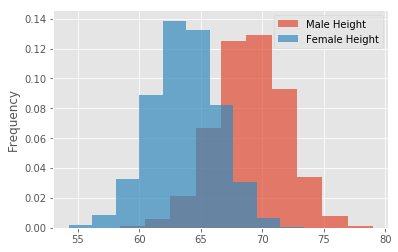

# Record your observations - are these inline with your personal observations?

The histograms show that men are generally taller than women. This is stereotypical, but it is also important to note that not all men are taller than all women.


#### Write a function density() that takes in a random variable and calculates the density function using `np.hist` and interpolation. The function should return two lists carrying x and y coordinates for plotting the density functio

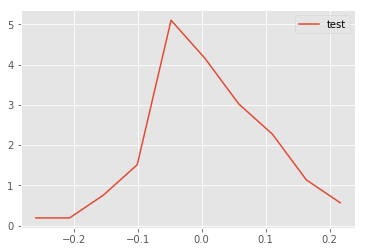

In [44]:
def density(x):
    n, bins = np.histogram(x, 10, density=1)
    
    pdfx = np.zeros(n.size)
    pdfy = np.zeros(n.size)
    
    for k in range(n.size):
        pdfx[k] = 0.5*(bins[k]+bins[k+1])
        pdfy[k] = n[k]
    return pdfx, pdfy

# Generate test data and test the function - uncomment to run the test
np.random.seed(5)
mu, sigma = 0, 0.1 # mean and standard deviation
s = np.random.normal(mu, sigma, 100)
x,y = density(s)
plt.plot(x,y, label = 'test')
plt.legend()

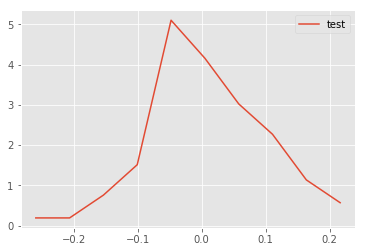

#### Add Overlapping density plots for male and female heights to the histograms plotted earlier

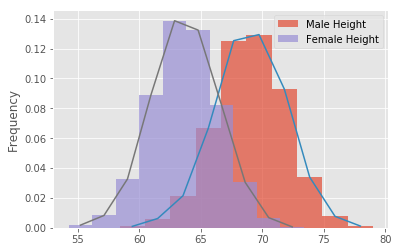

In [45]:
# You code here
fig, ax = plt.subplots()

x,y = density(male_df['Height'])
x1,y1 = density(female_df['Height'])

ax.hist(male_df['Height'], bins=10, density=True, alpha=0.7, label='Male Height')
ax.plot(x,y)

ax.hist(female_df['Height'], bins=10, density=True, alpha=0.7, label='Female Height')
ax.plot(x1,y1)

ax.set_ylabel('Frequency')
ax.legend()

plt.show()

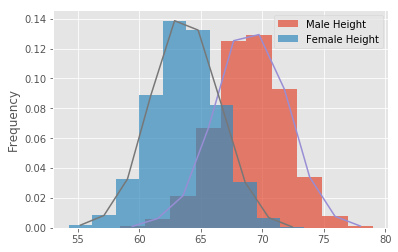

#### Repeat above exerice for male and female weights

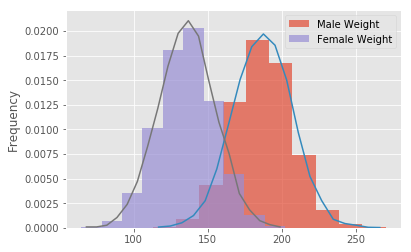

In [43]:
# Your code here
fig, ax = plt.subplots()

x2,y2 = density(male_df['Weight'])
x3,y3 = density(female_df['Weight'])

ax.hist(male_df['Weight'], bins=10, density=True, alpha=0.7, label='Male Weight')
ax.plot(x2,y2,)

ax.hist(female_df['Weight'], bins=10, density=True, alpha=0.7, label='Female Weight')
ax.plot(x3,y3)

ax.set_ylabel('Frequency')
ax.legend()

plt.show()

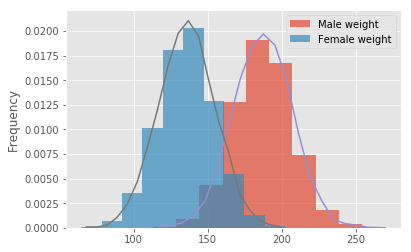

#### Write your observations in the cell below.

# Record your observations - are these inline with your personal observations?

Similarly with heights, men generally weigh more than women, but not all men weigh more than all women.

# So whats the takeaway when comparing male and female heights and weights 

Men are generally taller and heavier than women. The peak frequency for weight was elevated as compared to the peak frequency for height in both male and female.

#### Repeat Above experiments in seaborn and compare with your results. 

In [47]:
!pip install seaborn
import seaborn as sns

    100% |████████████████████████████████| 215kB 16.2MB/s ta 0:00:01
You are using pip version 10.0.1, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


Text(0.5,1,'Comparing weights')

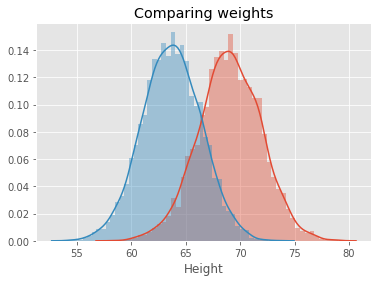

Text(0.5,1,'Comparing Weights')

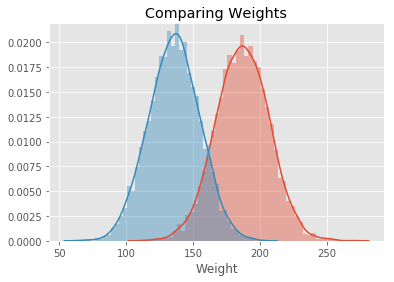

/opt/conda/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


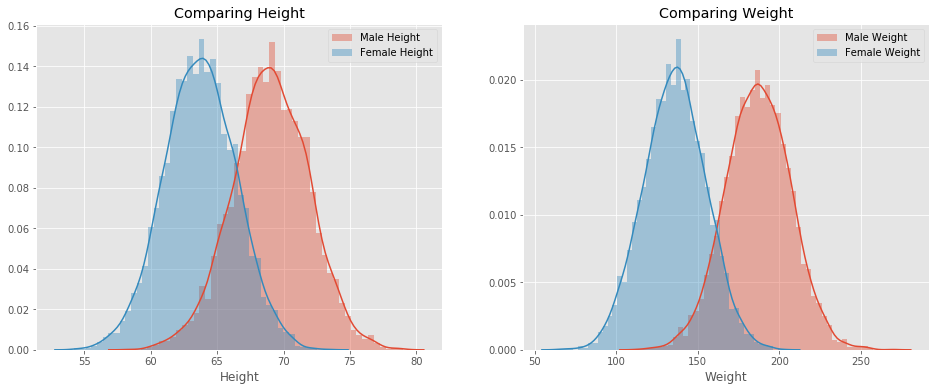

In [60]:
fig = plt.figure(figsize=(16,6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

sns.distplot(male_df['Height'], ax=ax1, label='Male Height')
sns.distplot(female_df['Height'], ax=ax1, label='Female Height')
ax1.set_title('Comparing Height')
ax1.legend()

sns.distplot(male_df['Weight'], ax=ax2, label='Male Weight')
sns.distplot(female_df['Weight'], ax=ax2, label='Female Weight')
ax2.set_title('Comparing Weight')
ax2.legend()

In [ ]:
# Your comments on the two approaches here. 
# are they similar ? what makes them different if they are ?

## Summary

In this lesson we saw how to build the probability density curves visually for given datasets and compare on the distribution visually by looking at the spread , center and overlap between data elements. This is a useful EDA technique and can be used to answer some initial questions before embarking on a complex analytics journey.